# Welcome to the Mushroom Toxicity Predictor for EVC! 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
%matplotlib inline
import seaborn as sns
from ipywidgets import Layout, Box, interact, interact_manual
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from IPython.display import display, clear_output, Image
from pandas import DataFrame

<p style="text-align:center"> The below chart represents the training set. It relies on equal representation of both edible and poisonous mushroom counts.</p>

<p style="text-align:center"><strong> If there is more than a 1000-point difference between the two peaks, consult your supervisor. </strong></p>

<AxesSubplot:title={'center':'Poisonous/Edible Counts in Dataset'}, ylabel='Counts'>

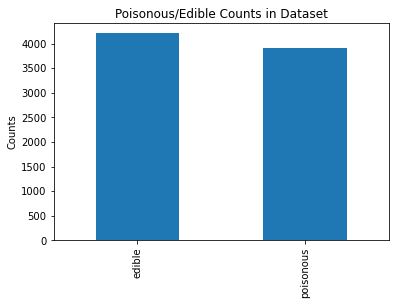

In [2]:
# model = joblib.load('MushAi.joblib')
df_data = pd.read_csv('MushData.csv')
df_key = pd.read_csv('MushKey.csv')
df_mushrooms = pd.read_csv('TrueData.csv')
pd.set_option('display.max_columns',23)

barPlot=df_data['Poisonous?'].value_counts().plot(kind='bar')
barPlot.set_title('Poisonous/Edible Counts in Dataset')
barPlot.set_ylabel('Counts')
barPlot

<p style="text-align:center"> The following is a correlation heatmap of the original training data.</p>

<AxesSubplot:>

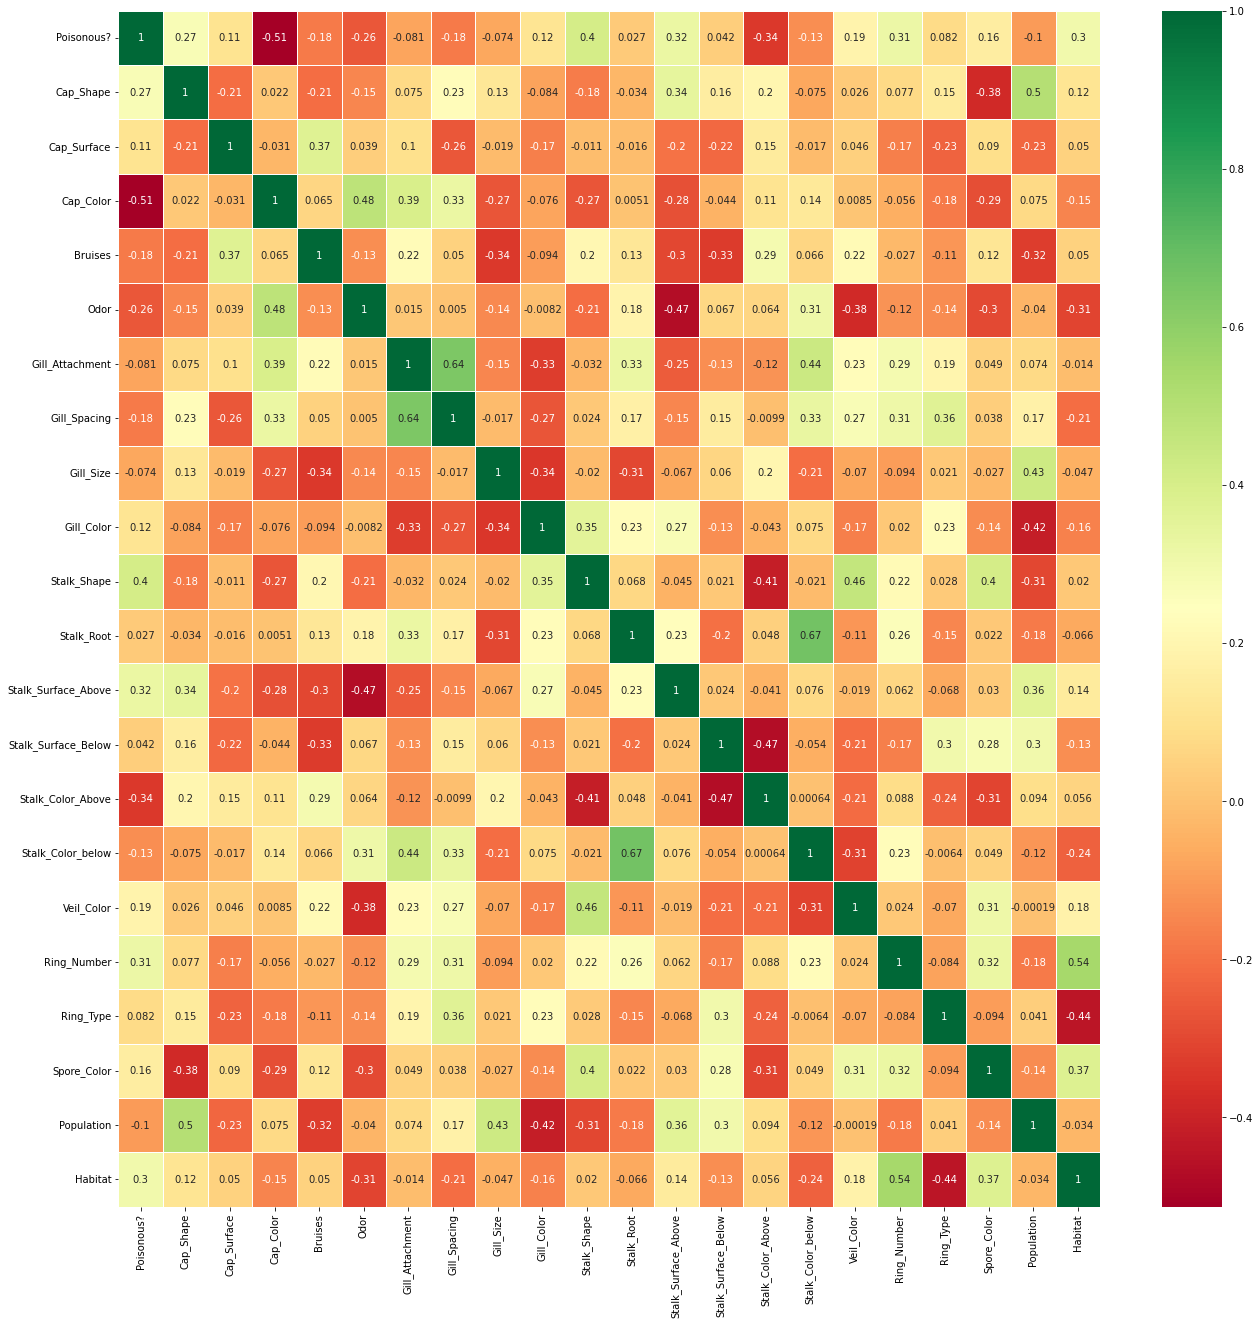

In [3]:
heatIndex = [('Poisonous?'),('Cap_Shape'),('Cap_Surface'),('Cap_Color'),('Bruises'),('Odor'),('Gill_Attachment'),('Gill_Spacing'),('Gill_Size'),('Gill_Color'),('Stalk_Shape'),('Stalk_Root'),('Stalk_Surface_Above'),('Stalk_Surface_Below'),('Stalk_Color_Above'),('Stalk_Color_below'),('Veil_Color'),('Ring_Number'),('Ring_Type'),('Spore_Color'),('Population'),('Habitat')]
heatCols = heatIndex
heat = DataFrame(abs(np.random.randn(22,22)), index = heatIndex, columns = heatCols)
heatAx = plt.subplots(figsize=(22,22))
sns.heatmap(heat.corr(), cmap='RdYlGn', annot= True, linewidths = .5)

<p style="text-align:center"> Search through the training data using the below dropdown tabs. After you have made your selection, click <strong> filter</strong></p>

In [4]:
searchCol = widgets.Dropdown(options=[('No Selection'),('Cap_Shape'),('Cap_Surface'),('Cap_Color'),('Bruises'),('Odor'),('Gill_Attachment'),('Gill_Spacing'),('Gill_Size'),('Gill_Color'),('Stalk_Shape'),('Stalk_Root'),('Stalk_Surface_Above'),('Stalk_Surface_Below'),('Stalk_Color_Above'),('Stalk_Color_below'),('Veil_Color'),('Ring_Number'),('Ring_Type'),('Spore_Color'),('Population'),('Habitat')],
                           value = 'No Selection',
                           description ='Select Column:',style = {'description_width':'initial'})

searchAttr = widgets.Dropdown(options=[('No Selection'),('bell'),('conical'),('flat'),('knobbed'),('sunken'),('convex'),('fibrous'),('grooves'),('smooth'),('scaly'),('buff'),('cinnamon'),('red'),('grey'),('brown'),('pink'),('green'),('purple'),('white'),('yellow'),('bruises'),('no bruises'),
                                        ('almond'),('creosote'),('foul'),('anise'),('musty'),('none'),('pungent'),('spicy'),
                                        ('fishy'),('attached'),('decending'),('free'),('notched'),('close'),('distant'),('crowded'),('broad'),('narrow'),('chocolate'),('black'),('orange'),('enlarging'),('tapering'),('bulbous'),('club'),('equal'),('missing'),('rooted'),('cup'),('rhizomorphs'),('silky'),('orange'),('universal'),('one'),('two'),('cobwebby'),('evanescent'),
                                        ('flaring'),('large'),('pendant'),('sheathing'),('zone'),('abundant'),('clustered'),('numerous'),('scattered'),('several'),('solitary'),('grasses'),('leaves'),('meadows'),('paths'),('urban'),('waste'),('woods')],
                            value = 'No Selection',
                            description ='Search For:',style = {'description_width':'initial'})

searchNumb = widgets.Dropdown(options=[('Last 10',10),('Last 50',50),('Last 100',100),('All very slow and laggy',9000)],
                           value = 10,
                           description ='Number of DataPoints:', style = {'description_width':'initial'})

 





items_search = [searchCol, searchAttr, searchNumb]
box_layout = Layout(flex_flow = 'wrap')

box_search = Box(children = items_search, layout = box_layout)
box_search

Box(children=(Dropdown(description='Select Column:', options=('No Selection', 'Cap_Shape', 'Cap_Surface', 'Cap…

In [5]:
disQuery = df_mushrooms
disQuery2 = df_mushrooms

def filterclicked(arg):
    df_mod = df_mushrooms
    filterCol = searchCol.value
    filterAttr = searchAttr.value
    filterNumb = searchNumb.value
    ('Cap_Shape'),('Cap_Surface'),('Cap_Color'),('Bruises'),('Odor'),('Gill_Attachment'),('Gill_Spacing'),('Gill_Size'),('Gill_Color'),('Stalk_Shape'),('Stalk_Root'),('Stalk_Surface_Above'),('Stalk_Surface_Below'),('Stalk_Color_Above'),('Stalk_Color_below'),('Veil_Color'),('Ring_Number'),('Ring_Type'),('Spore_Color'),('Population'),('Habitat')
    if filterCol == "Cap_Shape":
        disQuery2 = df_mod.query('Cap_Shape == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Cap_Surface":
        disQuery2 = df_mod.query('Cap_Surface == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Cap_Color":
        disQuery2 = df_mod.query('Cap_Color == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Bruises":
        disQuery2 = df_mod.query('Bruises == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Odor":
        disQuery2 = df_mod.query('Odor == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Gill_Attachment":
        disQuery2 = df_mod.query('Gill_Attachment == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Gill_Spacing":
        disQuery2 = df_mod.query('Gill_Spacing == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Gill_Size":
        disQuery2 = df_mod.query('Gill_Size == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Gill_Color":
        disQuery2 = df_mod.query('Gill_Color == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Stalk_Shape":
        disQuery2 = df_mod.query('Stalk_Shape == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Stalk_Root":
        disQuery2 = df_mod.query('Stalk_Root == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Stalk_Surface_Above":
        disQuery2 = df_mod.query('Stalk_Surface_Above == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Stalk_Surface_Below":
        disQuery2 = df_mod.query('Stalk_Surface_Below == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Stalk_Color_Above":
        disQuery2 = df_mod.query('Stalk_Color_Above == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Stalk_Color_below":
        disQuery2 = df_mod.query('Stalk_Color_below == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Veil_Color":
        disQuery2 = df_mod.query('Veil_Color == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Ring_Number":
        disQuery2 = df_mod.query('Ring_Number == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Ring_Type":
        disQuery2 = df_mod.query('Ring_Type == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Spore_Color":
        disQuery2 = df_mod.query('Spore_Color == @filterAttr' ).tail(searchNumb.value)
    elif filterCol == "Habitat":
        disQuery2 = df_mod.query('Habitat == @filterAttr' ).tail(searchNumb.value)    
    else:
        disQuery2 = df_mod.tail(searchNumb.value)
    disQuery = disQuery2 
    display(disQuery)
    clear_output()

    filterbutton = widgets.Button(description="Filter", disabled = False)
    filterbutton.on_click(filterclicked)
    display(filterbutton)  
    display(disQuery2)

def changefilterclicked(arg):
    disQuery = disQuery2
searchCol.observe(changefilterclicked, names= "value")
searchAttr.observe(changefilterclicked, names= "value")
filterbutton = widgets.Button(description="Filter", disabled = False)
filterbutton.on_click(filterclicked)

    
display(filterbutton)
display(disQuery)

 


Button(description='Filter', style=ButtonStyle())

,Poisonous?,Cap_Shape,Cap_Surface,Cap_Color,Bruises,Odor,Gill_Attachment,Gill_Spacing,Gill_Size,Gill_Color,Stalk_Shape,Stalk_Root,Stalk_Surface_Above,Stalk_Surface_Below,Stalk_Color_Above,Stalk_Color_below,Veil_Color,Ring_Number,Ring_Type,Spore_Color,Population,Habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,grey,no bruises,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no bruises,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no bruises,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no bruises,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no bruises,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,white,one,evanescent,white,several,leaves


<p style="text-align:center">The following is a graphical representation of the decision tree used in this program’s predictions. </p>

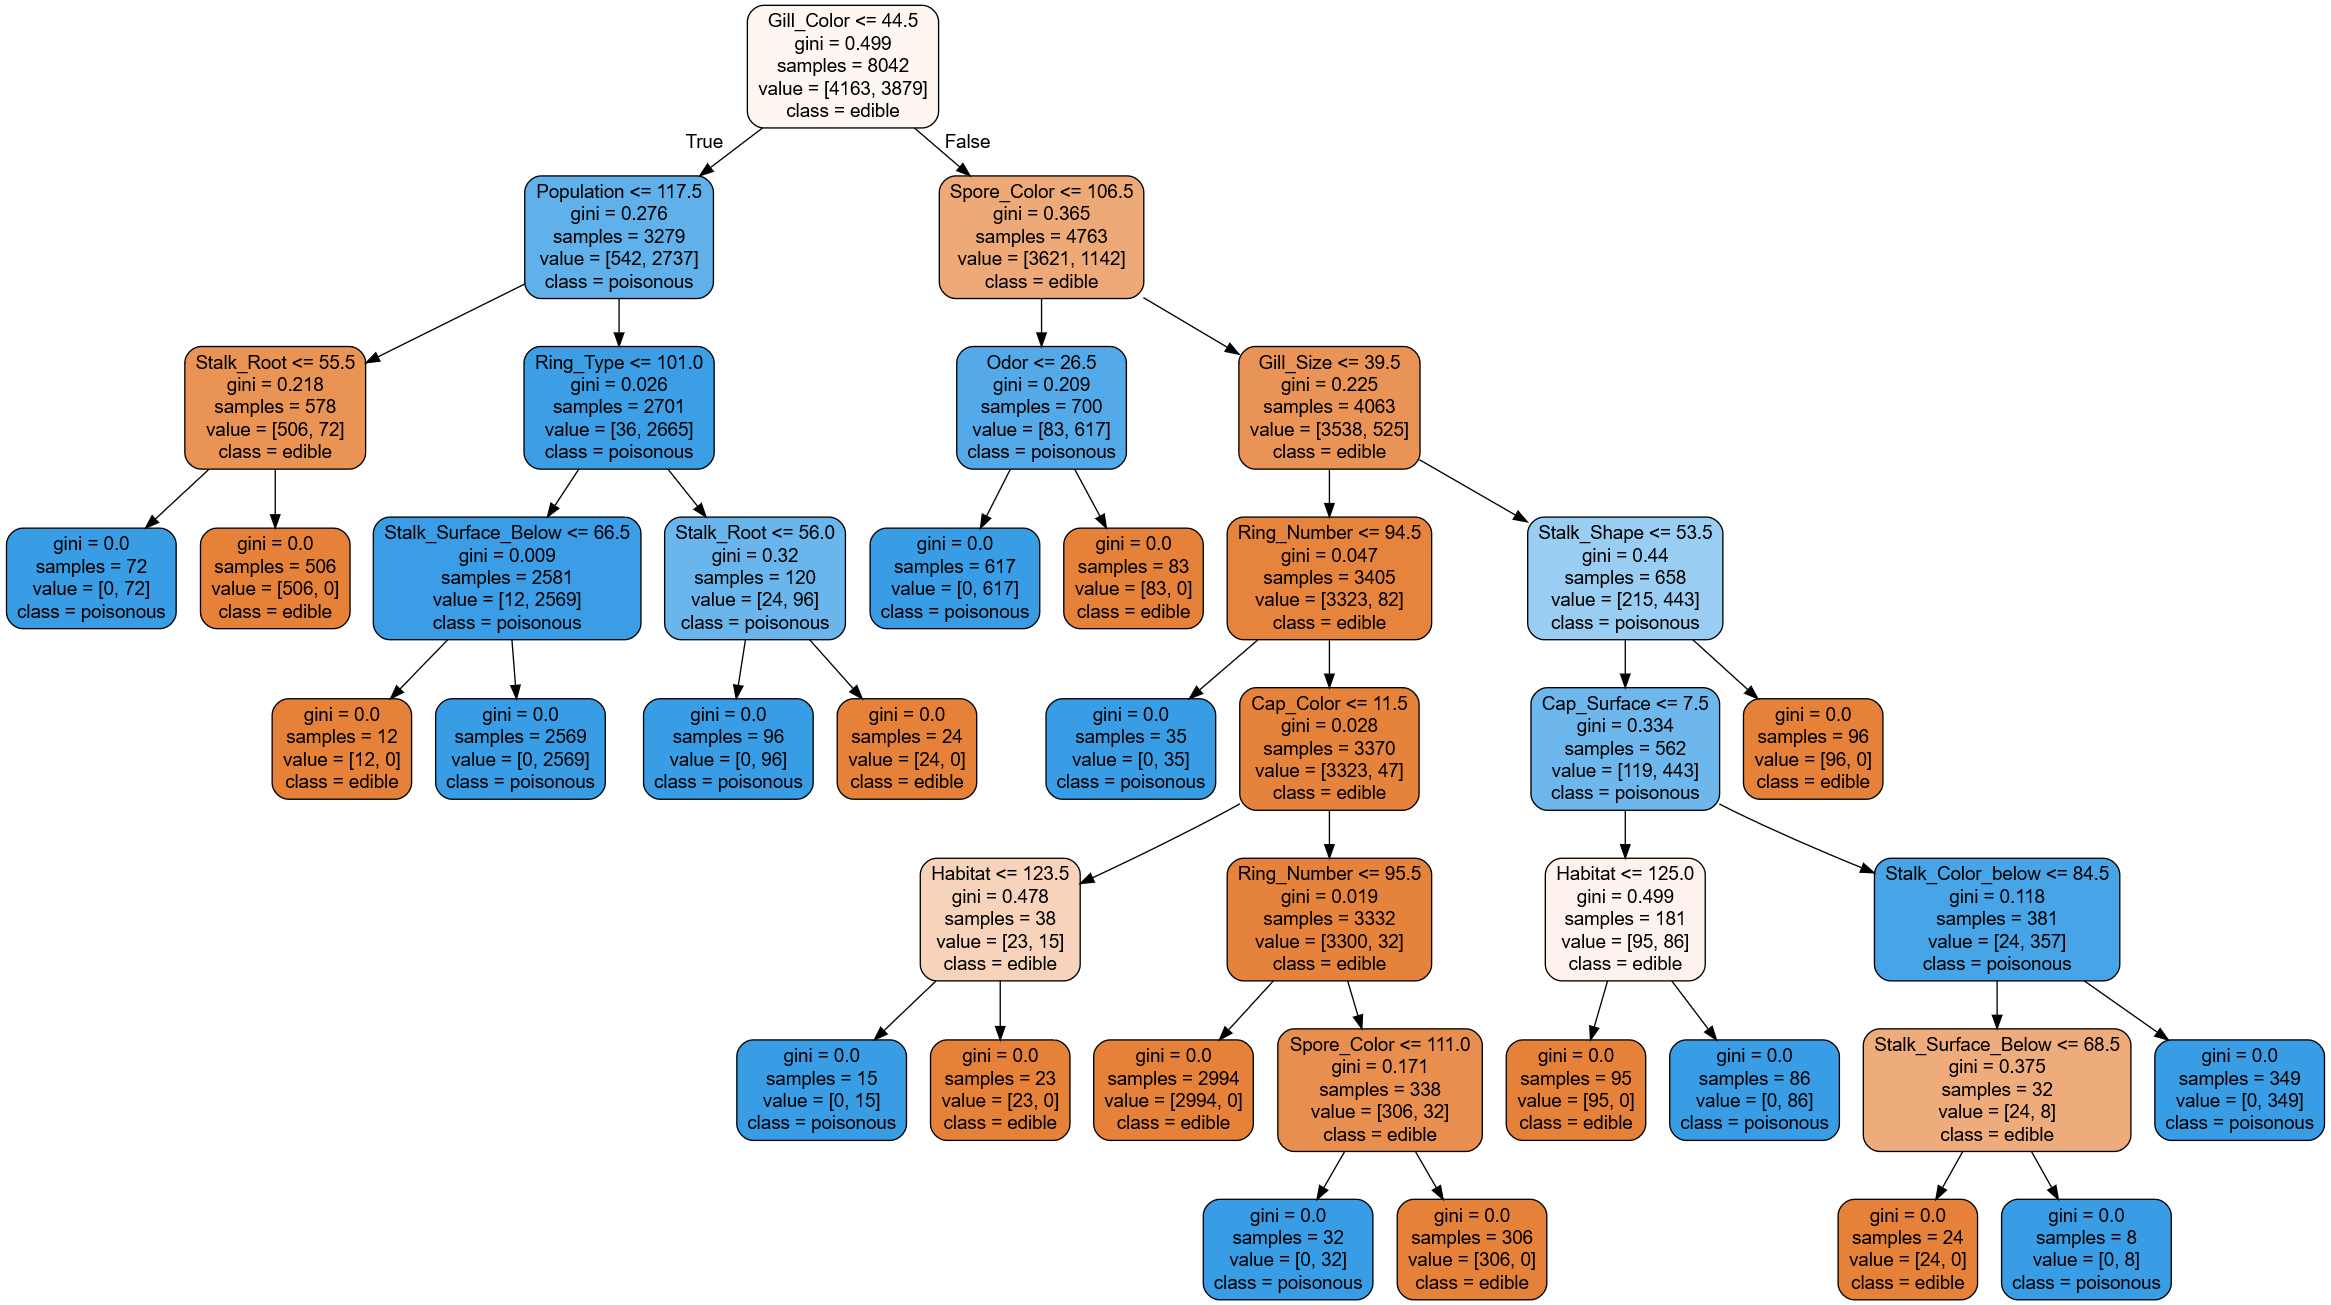

In [6]:
Image("graphviz.png")

<p style="text-align:center">Below is the confusion matrix for the in-use decision tree.</p> 

<p style="text-align:center"><strong>Note that if the Youden's Index percentage is less than 90%, retrain (reload) the program. </strong></p>

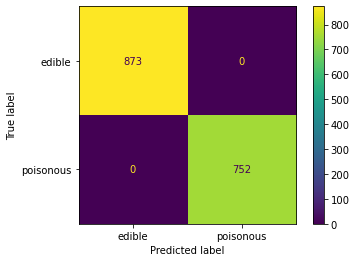

Box(children=(Label(value="Likelyhood of making an informed decision based on Youden's Index : 100.0%"),), lay…

In [7]:
X = pd.DataFrame((df_data.drop(columns=['Poisonous?'])).to_numpy())
y = df_data['Poisonous?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

conmx = confusion_matrix(y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conmx, display_labels=model.classes_)
disp.plot()
plt.show()
conmx
true_pos = conmx[0][0]
true_neg = conmx[1][1]
false_pos = conmx[1][0]
false_neg = conmx[0][1]
total_pos = true_pos+false_pos
total_neg = true_neg+false_neg
total_pop = total_pos + total_neg

f1var = (2*true_pos)/((2*true_pos)+false_pos+false_neg)
ydJ = ((true_pos/total_pos)+(true_neg/total_neg)-1)*100


str2 = "Likelyhood of making an informed decision based on Youden's Index : " + str(ydJ)+"%"


test2 = widgets.Label(value= str2)
items_mx =[test2]
boxs_mx  = Box(children = items_mx, layout=box_layout)
boxs_mx 



<p style="text-align:center"><strong>Choose the appropriate choice from each dropdown menu.</strong> </p>

<p style="text-align:center"><em>If you cannot remember what physical property each parameter represents, consult a supervisor or team lead. Do not leave any values blank.</em></p>

In [8]:
capShape = widgets.Dropdown(options=[('bell',1),('conical',2),('flat',3),('knobbed',4),('sunken',5),('convex',6)],
                           value = 6,
                           description ='Cap Shape:',style = {'description_width':'initial'})

capSurface = widgets.Dropdown(options=[('fibrous',7),('grooves',8),('smooth',9),('scaly',10)],
                           value = 10,
                           description ='Cap Surface:',style = {'description_width':'initial'})

capColor = widgets.Dropdown(options=[('buff',11),('cinnamon',12),('red',13),('grey',14),('brown',15),('pink',16),('green',17),('purple',18),('white',19),('yellow',20)],
                           value = 20,
                           description ='Cap Color:',style = {'description_width':'initial'})

bruises = widgets.Dropdown(options=[('bruises',21),('no bruises',22)],
                           value = 22,
                           description ='Bruises?:',style = {'description_width':'initial'})

odor = widgets.Dropdown(options=[('almond',23),('creosote',24),('foul',25),('anise',26),('musty',27),('none',28),('pungent',29),('spicy',30),('fishy',31)],
                           value = 31,
                           description ='Odor:',style = {'description_width':'initial'})

gillAttach = widgets.Dropdown(options=[('attached',32),('decending',33),('free',34),('notched',35)],
                           value = 35,
                           description ='Gill Attachment:',style = {'description_width':'initial'})

gillSpace = widgets.Dropdown(options=[('close',36),('distant',37),('crowded',38)],
                           value = 38,
                           description ='Gill Spacing:',style = {'description_width':'initial'})

gillSize = widgets.Dropdown(options=[('broad',39),('narrow',40)],
                           value = 40,
                           description ='Gill Size:',style = {'description_width':'initial'})

gillcolor = widgets.Dropdown(options=[('buff',41),('red',42),('grey',43),('chocolate',44),('black',45),('brown',46),('orange',47),('pink',48),('green',49),('purple',50),('white',51),('yellow',52)],
                           value = 41,
                           description ='Gill Color:',style = {'description_width':'initial'})

stalkshape = widgets.Dropdown(options=[('enlarging',53),('tapering',54)],
                           value = 54,
                           description ='Stalk Shape:',style = {'description_width':'initial'})

stalkroot = widgets.Dropdown(options=[('bulbous',55),('club',56),('equal',57),('missing',58),('rooted',59),('cup',60),('rhizomorphs',61)],
                           value = 55,
                           description ='Stalk Root:',style = {'description_width':'initial'})

ssabovering = widgets.Dropdown(options=[('fibrous',62),('silky',63),('smooth',64),('scaly',65)],
                           value = 62,
                           description ='Stalk Shape Above Ring',style = {'description_width':'initial'})

ssbelowring = widgets.Dropdown(options=[('fibrous',66),('silky',67),('smooth',68),('scaly',69)],
                           value = 66,
                           description ='Stalk Shape Below Ring:',style = {'description_width':'initial'})

scabovering = widgets.Dropdown(options=[('buff',70),('cinnamon',71),('red',72),('grey',73),('brown',74),('orange',75),('pink',76),('white',77),('yellow',78)],
                           value = 70,
                           description ='Stalk Color Above Ring:',style = {'description_width':'initial'})

scbelowring = widgets.Dropdown(options=[('buff',79),('cinnamon',80),('red',81),('grey',82),('brown',83),('orange',84),('pink',85),('white',86),('yellow',87)],
                           value = 82,
                           description ='Stalk Color Below Ring:',style = {'description_width':'initial'})

veilcolor = widgets.Dropdown(options=[('brown',90),('orange',91),('white',92),('yellow',93)],
                           value = 92,
                           description ='Veil Color:',style = {'description_width':'initial'})

ringnumber = widgets.Dropdown(options=[('none',94),('one',95),('two',96)],
                           value = 94,
                           description ='Ring Number:',style = {'description_width':'initial'})

ringtype = widgets.Dropdown(options=[('cobwebby',97),('evanescent',98),('flaring',99),('large',100),('none',101),('pendant',102),('sheathing',103),('zone',104)],
                           value = 97,
                           description ='Ring Type:',style = {'description_width':'initial'})

sporecolor = widgets.Dropdown(options=[('buff',105),('chocolate',106),('black',107),('brown',108),('orange',109),('green',110),('purple',111),('white',112),('yellow',113)],
                           value = 105,
                           description ='Spore Print Color:', style = {'description_width':'initial'})

populat = widgets.Dropdown(options=[('abundant',114),('clustered',115),('numerous',116),('scattered',117),('several',118),('solitary',119)],
                           value = 114,
                           description ='Population:',style = {'description_width':'initial'})

habitat = widgets.Dropdown(options=[('grasses',120),('leaves',121),('meadows',122),('paths',123),('urban',124),('waste',125),('woods',126)],
                           value = 122,
                           description ='Habitat:',style = {'description_width':'initial'})

items = [capShape,capSurface,capColor,bruises,odor,gillAttach,gillSpace,gillSize,gillcolor,stalkshape,stalkroot,ssabovering,ssbelowring,scabovering,scbelowring,veilcolor,ringnumber,ringtype,sporecolor,populat,habitat]

box_layout = Layout(flex_flow = 'wrap')

box = Box(children = items, layout = box_layout)
box

Box(children=(Dropdown(description='Cap Shape:', index=5, options=(('bell', 1), ('conical', 2), ('flat', 3), (…

<p style="text-align:center">Click <strong>“Predict” </strong>once all the above parameters are complete and then <em>begin appropriate treatment </em>for the patient. </p>

In [9]:
def clicked(arg):   
    thePrediction = model.predict([[
        (capShape.options[capShape.index])[1],(capSurface.options[capSurface.index])[1],(capColor.options[capColor.index])[1],(bruises.options[bruises.index])[1],(odor.options[odor.index])[1],
        (gillAttach.options[gillAttach.index])[1],(gillSpace.options[gillSpace.index])[1],(gillSize.options[gillSize.index])[1],(gillcolor.options[gillcolor.index])[1],(stalkshape.options[stalkshape.index])[1],
        (stalkroot.options[stalkroot.index])[1],(ssabovering.options[ssabovering.index])[1],(ssbelowring.options[ssbelowring.index])[1],(scabovering.options[scabovering.index])[1],(scbelowring.options[scbelowring.index])[1],
        (veilcolor.options[veilcolor.index])[1],(ringnumber.options[ringnumber.index])[1],(ringtype.options[ringtype.index])[1],(sporecolor.options[sporecolor.index])[1],(populat.options[populat.index])[1],(habitat.options[habitat.index])[1]]])
    
    display_box.value = str(thePrediction)



button = widgets.Button(description="Predict", disabled = False)
button.on_click(clicked)
# display(button)

display_box = widgets.Label(value= "default")
# display(display_box)

items2 =[button, display_box]
box2 = Box(children = items2, layout=box_layout)
box2

Box(children=(Button(description='Predict', style=ButtonStyle()), Label(value='default')), layout=Layout(flex_…

In [10]:
with open('timestamp.txt', 'a') as fp:
    fp.write("test")
#%load_ext watermark    

In [11]:
#%watermark --python --iversions